In [1]:
#importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing the csv file
data=pd.read_csv(r'C:\Users\satvi\OneDrive\Desktop\Advertising.csv')
data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


All the data is of continous type and the data to be predicted also continous type so it is a regression problem and in the dataset there is a column with unnamed:0 which is of no usage so am going to drop that column

In [3]:
#dropping the unuseful column
data=data.drop(['Unnamed: 0'],axis=1)

In [4]:
#getting the top 5 information data
data.head()


,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [5]:
#checking for the shape of the data
data.shape

(200, 4)

In [6]:
#checking for missing values
data.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

There are no null values in the dataset

In [7]:
#checking for the type of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


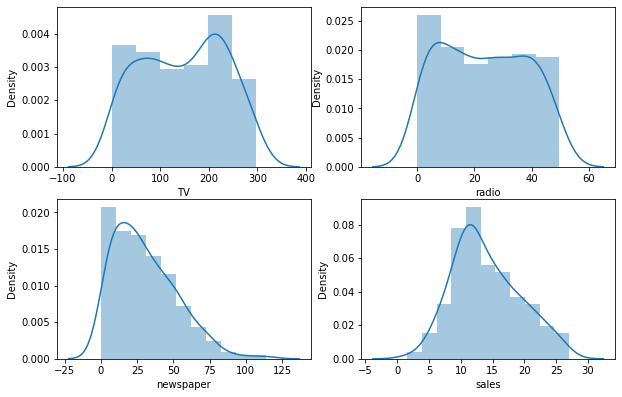

In [8]:
#checking for the flow of the data using dist plot
plt.figure(figsize=(10,10),facecolor='white')
plotnumber=1
for column in data:
    if plotnumber<=6:
        ax=plt.subplot(3,2,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()
        
    

In all of the columns the data seems to be of neative and positive sided both is that of actual with the outliers or really the with the negative data yet we need to know lets check with plotting with box plot
and Based on tv channels the sales are more in the range of 0 to 200 among that the peak is at 150 to 200.from 200 to 400 the sales dropped almost the data is normally distributed in all of the columns

In [9]:
#lets check the scatter plot to find the relation ship
#lets divide our features and label
x=data.drop(['sales'],axis=1)
y=data['sales']

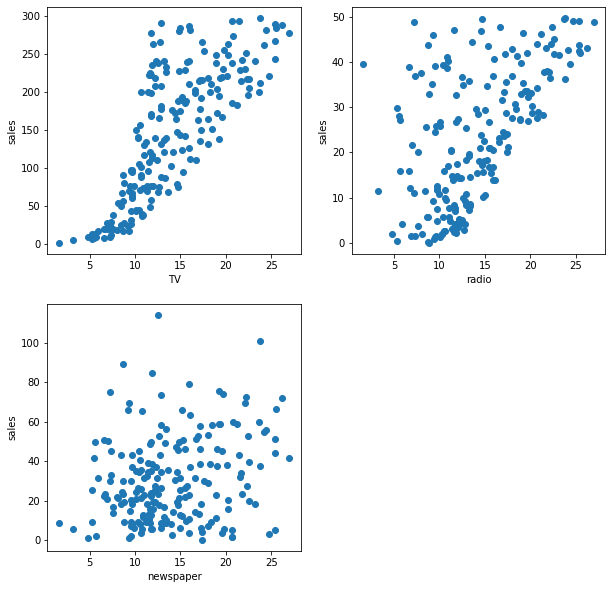

In [10]:
plt.figure(figsize=(10,10),facecolor='white')
plotnumber=1
for column in x:
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        plt.scatter(y,x[column])
        plt.xlabel(column,fontsize=10)
        plt.ylabel('sales',fontsize=10)
    plotnumber+=1
plt.show()
        
    

from the above scatter plot 

1.we can see that there is a linear graph for tv,that means as if we spend on adveritising of our products on Tv we can improve our sales, see if we send 5 dollars on advertising on tv then we can improve sales upto 20 dollars if we spend 10 we can improve upto 50 there is a linear relation ship.If we invest 1% we are earning 2% which means profit.

2.when it comes to radio there some linearity that means spending on radio is also good,which means if we spend 5 dollars on advertising on radio then we can improve the sales upto 5 dollars if we spend 1%  we can earn 1% so we have no loss or profit in this by advertising on radio.

3.But when it comes to newspaper there is non uniformity in the graph which means in any of the way spending on newspaper will not improve our sales also it means there is a loss for the company by spending on newspaper.Because we are not improving our sales and we are investing on advertising on newspaper.IN the graph as we are spending the money on the newspaper of 5 dollars the sales dropping near to zero which means there is no relationship.

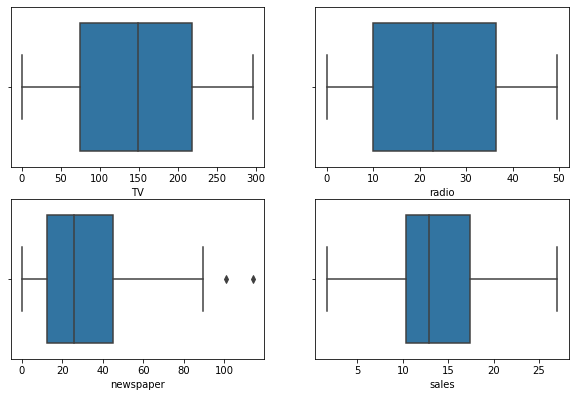

In [11]:
#checking for the flow of the data using dist plot
plt.figure(figsize=(10,10),facecolor='white')
plotnumber=1
for column in data:
    if plotnumber<=6:
        ax=plt.subplot(3,2,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()
        
    

There are outliers present only in newspaper that to only the higher side the outliers are present and lets gohead and remove the outliers using quartile method

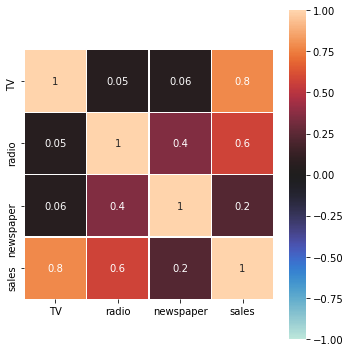

In [12]:
#lets plot the corelation plot
#lets plot the heat map to find the corelation
df_corr=data.corr().abs()
plt.figure(figsize=(5,5))
sns.heatmap(df_corr,vmin=-1,vmax=1,annot=True,square=True,center=0,fmt='.1g',linewidth=.2)
plt.tight_layout()

from heat map we can say that sales are highly corelated with Tv,moderatley corelated with radio and very less corelated with newspaper,and there is no corelation between feature to feature so we can say there is no multicollinearity problem

In [13]:
#importing the stats from the scipy library
from scipy import stats
#lets remove our ouliers using z_score
z=np.abs(stats.zscore(data))#abs=absolute numberprint(z)


In [14]:
#Rows having outliers more than 3 standard deviation
print('Row Numbers \n',np.where(z>3)[0])

Row Numbers 
 [ 16 101]


In [15]:
#Columns having outliers more than 3 standard deviation
print('column numbers \n',np.where(z>3)[1])

column numbers 
 [2 2]


In [16]:
#dropping some of the data of rows which r having outliers
index=(np.where(z>3)[0])
data=data.drop(data.index[index])

In [17]:
#checking the shape of the data
data.shape

(198, 4)

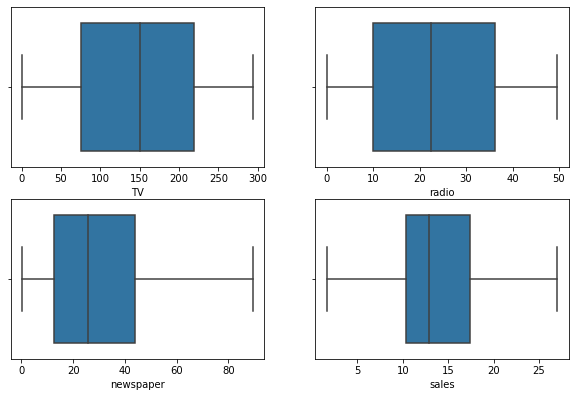

In [18]:
#checking for the flow of the data using dist plot
plt.figure(figsize=(10,10),facecolor='white')
plotnumber=1
for column in data:
    if plotnumber<=6:
        ax=plt.subplot(3,2,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()
        
    

Now we have removed our outliers using zscore method

In [19]:
#Checking the skewness
data.skew()

TV          -0.082332
radio        0.114842
newspaper    0.650112
sales        0.407130
dtype: float64

We have very less skewness lets use log transformation to remove the skewness

In [20]:
#importing power_transform to remove skewness
from sklearn.preprocessing import power_transform
data_new=power_transform(x)
data_new=pd.DataFrame(data_new,columns=x.columns)
x=data_new

In [21]:
#Scaling the data using standard scaler since our data looks normal
#importing standard scaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=scaler.fit_transform(x)

In [68]:
#importing some of the libraries to build our model
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn import metrics

### Linear Regression

In [69]:
#splitting the data into train test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=340)
#fitting the Linear Regression model
lr=LinearRegression()
lr.fit(x_train,y_train)


LinearRegression()

In [70]:
y_test.head()

73     11.0
109    19.8
193    19.6
104    20.7
42     20.7
Name: sales, dtype: float64

In [71]:
#Predicting
y_pred=lr.predict(x_test)

In [72]:
#Score
lr.score(x_test,y_test)

0.9227790295575561

In [73]:
#Cv score
scr=cross_val_score(lr,x,y,cv=5)
print('Cross validation score: ',scr.mean()*100)

Cross validation score:  89.78060430607071


In [74]:
#error
mean_squared_error(y_test,y_pred)

1.8354819261760644

In [75]:
mean_absolute_error(y_test,y_pred)

1.0364473027549599

In [76]:
np.sqrt(mean_absolute_error(y_test,y_pred))

1.0180605594732368

### KNeighbors Regressor

In [77]:
#Using KNN model for predicting
knn=KNeighborsRegressor()
knn.fit(x_train,y_train)

KNeighborsRegressor()

In [78]:
#prediction
y_pred=knn.predict(x_test)

In [79]:
#R2 score
knn.score(x_test,y_test)

0.9410127788817267

In [80]:
#CV score
scr=cross_val_score(knn,x,y,cv=5)
print('Cross validation score: ',scr.mean()*100)

Cross validation score:  94.375032010148


In [81]:
#error
mean_squared_error(y_test,y_pred)

1.4020799999999998

In [82]:
mean_absolute_error(y_test,y_pred)

0.884

In [83]:
np.sqrt(mean_absolute_error(y_test,y_pred))

0.9402127418834527

### Decision Tree Regressor

In [84]:
#Using Decision tree regressor
#Instantiating
DT=DecisionTreeRegressor()
DT.fit(x_train,y_train)

DecisionTreeRegressor()

In [85]:
#prediction
y_pred=DT.predict(x_test)

In [86]:
DT.score(x_test,y_test)

0.9244064255211446

In [87]:
#CV score
scr=cross_val_score(DT,x,y,cv=5)
print('Cross validation score: ',scr.mean()*100)

Cross validation score:  95.88386303223075


In [88]:
#error
mean_squared_error(y_test,y_pred)

1.7968000000000008

In [89]:
mean_absolute_error(y_test,y_pred)

0.9440000000000002

In [90]:
np.sqrt(mean_absolute_error(y_test,y_pred))

0.9715966241192896

### Random Forest Regressor

In [91]:
#Using Random Forest Regressor
#Instantiating
rf=RandomForestRegressor()
rf.fit(x_train,y_train)

RandomForestRegressor()

In [92]:
#Prediction
y_pred=rf.predict(x_test)

In [93]:
#R2 score
rf.score(x_test,y_test)

0.9771350254042878

In [94]:
#CV score
scr=cross_val_score(rf,x,y,cv=5)
print('Cross validation score: ',scr.mean()*100)

Cross validation score:  97.58974816053822


In [95]:
#MSE
mean_squared_error(y_test,y_pred)

0.5434825199999965

In [96]:
#MASE
mean_absolute_error(y_test,y_pred)

0.586999999999999

In [97]:
#SMAE
np.sqrt(mean_absolute_error(y_test,y_pred))

0.7661592523751175

### Support Vector Regressor

In [98]:
#Using SVC
svm=SVR()
svm.fit(x_train,y_train)


SVR()

In [99]:
#Predicting
y_pred=svm.predict(x_test)

In [100]:
#R2 score
svm.score(x_test,y_test)

0.9345660729570365

In [101]:
#Validation score
scr=cross_val_score(svm,x,y,cv=5)
print('Cross validation score: ',scr.mean()*100)

Cross validation score:  91.71386899137434


In [102]:
#MSE
mean_squared_error(y_test,y_pred)

1.555313145612441

In [103]:
#MASE
mean_absolute_error(y_test,y_pred)

0.7439270938170023

In [104]:
#SMASE
np.sqrt(mean_absolute_error(y_test,y_pred))

0.8625120832875341

### Lasso Regressor

In [105]:
#Instantiating
lp=Lasso()
lp.fit(x_train,y_train)

Lasso()

In [106]:
#predicting
y_pred=lp.predict(x_test)

In [107]:
#score
lp.score(x_test,y_test)

0.8455969569192796

In [108]:
#cross validation score
scr=cross_val_score(lp,x,y,cv=5)
print('Cross validation score: ',scr.mean()*100)

Cross validation score:  82.70960357806553


In [109]:
#MSE
mean_squared_error(y_test,y_pred)

3.6700392820429486

In [110]:
#MASE
mean_absolute_error(y_test,y_pred)

1.489704204502467

In [111]:
#SMASE
np.sqrt(mean_absolute_error(y_test,y_pred))

1.220534393002699

### Ridge Regressor

In [112]:
#Instantiating
rp=Ridge()
rp.fit(x_train,y_train)

Ridge()

In [113]:
#prediction
y_pred=rp.predict(x_test)

In [114]:
#R2 Score
rp.score(x_test,y_test)

0.9226739240645747

In [115]:
#cross val score
scr=cross_val_score(rp,x,y,cv=5)
print('Cross validation score: ',scr.mean()*100)

Cross validation score:  89.78620959324856


In [116]:
#MSE
mean_squared_error(y_test,y_pred)

1.8379802013415243

In [117]:
#MASE
mean_absolute_error(y_test,y_pred)

1.039458895518848

In [118]:
#SMASE
np.sqrt(mean_absolute_error(y_test,y_pred))

1.0195385699025064

Random forest Regressor is giving the highest performence of the model the both R2 sore and cross validation scores are same and the errors calculated for Random forest model is very less compared to other models.So the best fit model is Random forest Regressor.As both the cross val score and R2 score are same so no need to do hyper parameter tuning fot this model

In [120]:
#comparing original data v/s predicted data
a=np.array(y_test)
predicted=np.array(y_pred)
df_com=pd.DataFrame({'Actual':a,'Predicted':predicted},index=range(len(a)))
df_com

,Actual,Predicted
0,11.0,10.373519
1,19.8,19.718816
2,19.6,18.419733
3,20.7,20.198060
4,20.7,21.245577
5,8.1,5.410954
6,14.6,14.901052
7,10.3,9.684992
8,22.1,20.443815
9,10.5,10.586587


In [119]:
#Saving the model
import pickle
filename='sales_prediction.pkl'
pickle.dump(rf,open(filename,'wb'))